# Working with Data APIs

Acknowledgments and appreciation to Sam Maurer, my PhD student who drafted the initial version of this material on APIs.

This notebook provides a demonstration of data-access APIs that operate over the web. 

In Part 1, we'll load and parse results from an API feed of earthquake data.  
In Part 2, we'll add query parameters to the workflow, using the Mapbox Geolocation API as an example.  
In Part 3, we'll use an authenticated API to query public Twitter posts. 

Before jumping in, let's quickly scan the range of APIs that are available:

* Socrata Open Data: https://dev.socrata.com/
  * San Francisco: https://datasf.org/opendata/
  * Berkeley: https://data.cityofberkeley.info/

* Transitland GTFS Feeds: https://transit.land/
* Ford Bike Share: https://www.fordgobike.com/system-data

* US Census Bureau: https://www.census.gov/data/developers/data-sets.html
* Bureau of Labor Statistics: https://www.bls.gov/developers/
* US Geological Survey: https://www.usgs.gov/products/data-and-tools/apis
* US Environmental Protection Agency: https://www.epa.gov/enviro/web-services

* Google APIs: https://console.developers.google.com/apis/library?project=cp255-185021
* Facebook: https://developers.facebook.com/docs/apis-and-sdks/
* Twitter: https://developer.twitter.com/en/docs/api-reference-index.html
* Foursquare: https://developer.foursquare.com/
* Instagram: https://www.instagram.com/developer/
* Yelp: https://www.yelp.com/developers

# Part 1: Reading from an automated data feed

### USGS real-time earthquake feeds

This is an API for near-real-time data about earthquakes. Data is provided in JSON format over the web. No authentication is needed, and there's no way to customize the output. Instead, the API has a separate endpoint for each permutation of the data that users might want.

**API documentation:**  
http://earthquake.usgs.gov/earthquakes/feed/v1.0/geojson.php

**Sample API endpoint, for magnitude 4.5+ earthquakes in past day:**  
http://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/4.5_day.geojson  


In [1]:
%matplotlib inline

import pandas as pd

import json      # library for working with JSON-formatted text strings
import requests  # library for accessing content from web URLs

import pprint    # library for cleanly printing Python data structures
pp = pprint.PrettyPrinter()

In [2]:
# download data on magnitude 2.5+ quakes from the past week

endpoint_url = "http://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/2.5_week.geojson"
response = requests.get(endpoint_url)
results = response.text

# what is the data type of the results?

print(type(results))

<class 'str'>


In [3]:
# print the first 500 characters to see a sample of the data

print(results[:500])

{"type":"FeatureCollection","metadata":{"generated":1602482070000,"url":"https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/2.5_week.geojson","title":"USGS Magnitude 2.5+ Earthquakes, Past Week","status":200,"api":"1.10.3","count":339},"features":[{"type":"Feature","properties":{"mag":4.1,"place":"37 km N of Palekastro, Greece","time":1602478832902,"updated":1602479948219,"tz":null,"url":"https://earthquake.usgs.gov/earthquakes/eventpage/us6000c7ps","detail":"https://earthquake.usgs.gov/e


In [4]:
# it looks like the results are a string with JSON-formatted data inside

# parse the string into a Python dictionary (loads = "load string")
data = json.loads(results)

print(type(data))

<class 'dict'>


If we try printing the data we will get a not very useful view of the API results:

print(data)

PP (for Pretty Print) preserves the structure of the data as a nested dictionary, making it much easier to navigate the results and understand their structure.

In [5]:
# print the dictionary

pp.pprint(data)

{'bbox': [-179.4012, -62.4834, -1.13, 175.4369, 71.6289, 660.76],
 'features': [{'geometry': {'coordinates': [26.2291, 35.5314, 10],
                            'type': 'Point'},
               'id': 'us6000c7ps',
               'properties': {'alert': None,
                              'cdi': 2.7,
                              'code': '6000c7ps',
                              'detail': 'https://earthquake.usgs.gov/earthquakes/feed/v1.0/detail/us6000c7ps.geojson',
                              'dmin': 0.76,
                              'felt': 1,
                              'gap': 160,
                              'ids': ',us6000c7ps,',
                              'mag': 4.1,
                              'magType': 'mb',
                              'mmi': None,
                              'net': 'us',
                              'nst': None,
                              'place': '37 km N of Palekastro, Greece',
                              'rms': 0.68,
                 

                              'tsunami': 0,
                              'type': 'earthquake',
                              'types': ',origin,phase-data,',
                              'tz': None,
                              'updated': 1602427664040,
                              'url': 'https://earthquake.usgs.gov/earthquakes/eventpage/us6000c7jx'},
               'type': 'Feature'},
              {'geometry': {'coordinates': [126.3336, 1.819, 39.66],
                            'type': 'Point'},
               'id': 'us6000c7jp',
               'properties': {'alert': None,
                              'cdi': None,
                              'code': '6000c7jp',
                              'detail': 'https://earthquake.usgs.gov/earthquakes/feed/v1.0/detail/us6000c7jp.geojson',
                              'dmin': 1.465,
                              'felt': None,
                              'gap': 111,
                              'ids': ',us6000c7jp,',
                

              {'geometry': {'coordinates': [-66.8285, 17.9856, 16],
                            'type': 'Point'},
               'id': 'pr2020285004',
               'properties': {'alert': None,
                              'cdi': None,
                              'code': '2020285004',
                              'detail': 'https://earthquake.usgs.gov/earthquakes/feed/v1.0/detail/pr2020285004.geojson',
                              'dmin': 0.0518,
                              'felt': None,
                              'gap': 166,
                              'ids': ',pr2020285004,',
                              'mag': 2.71,
                              'magType': 'md',
                              'mmi': None,
                              'net': 'pr',
                              'nst': 22,
                              'place': '1 km SW of Indios, Puerto Rico',
                              'rms': 0.15,
                              'sig': 113,
                          

                              'url': 'https://earthquake.usgs.gov/earthquakes/eventpage/us6000c7b1'},
               'type': 'Feature'},
              {'geometry': {'coordinates': [-157.2102, 66.2859, 0.1],
                            'type': 'Point'},
               'id': 'ak020d1vg8ve',
               'properties': {'alert': None,
                              'cdi': None,
                              'code': '020d1vg8ve',
                              'detail': 'https://earthquake.usgs.gov/earthquakes/feed/v1.0/detail/ak020d1vg8ve.geojson',
                              'dmin': None,
                              'felt': None,
                              'gap': None,
                              'ids': ',us6000c7ay,ak020d1vg8ve,',
                              'mag': 2.7,
                              'magType': 'ml',
                              'mmi': None,
                              'net': 'ak',
                              'nst': None,
                              'pla

                              'mag': 2.7,
                              'magType': 'ml',
                              'mmi': None,
                              'net': 'ak',
                              'nst': None,
                              'place': '32 km SW of Noatak, Alaska',
                              'rms': 0.57,
                              'sig': 112,
                              'sources': ',us,ak,',
                              'status': 'automatic',
                              'time': 1602264919446,
                              'title': 'M 2.7 - 32 km SW of Noatak, Alaska',
                              'tsunami': 0,
                              'type': 'earthquake',
                              'types': ',origin,phase-data,',
                              'tz': None,
                              'updated': 1602268936040,
                              'url': 'https://earthquake.usgs.gov/earthquakes/eventpage/ak020d0bf4lk'},
               'type': 'Feature'}

                              'rms': 0.33,
                              'sig': 148,
                              'sources': ',us,',
                              'status': 'reviewed',
                              'time': 1602214800216,
                              'title': 'M 3.1 - 55 km SSW of Whites City, New '
                                       'Mexico',
                              'tsunami': 0,
                              'type': 'earthquake',
                              'types': ',origin,phase-data,',
                              'tz': None,
                              'updated': 1602215463040,
                              'url': 'https://earthquake.usgs.gov/earthquakes/eventpage/us6000c6y3'},
               'type': 'Feature'},
              {'geometry': {'coordinates': [-104.583, 31.7094, 5],
                            'type': 'Point'},
               'id': 'us6000c6xp',
               'properties': {'alert': None,
                              'cdi': None,
   

                              'status': 'reviewed',
                              'time': 1602172446490,
                              'title': 'M 2.5 - 0 km E of Magas Arriba, Puerto '
                                       'Rico',
                              'tsunami': 0,
                              'type': 'earthquake',
                              'types': ',origin,phase-data,',
                              'tz': None,
                              'updated': 1602173686179,
                              'url': 'https://earthquake.usgs.gov/earthquakes/eventpage/pr2020282011'},
               'type': 'Feature'},
              {'geometry': {'coordinates': [-25.5913, -58.9377, 79.34],
                            'type': 'Point'},
               'id': 'us6000c6sf',
               'properties': {'alert': None,
                              'cdi': None,
                              'code': '6000c6sf',
                              'detail': 'https://earthquake.usgs.gov/earthquakes/

                            'type': 'Point'},
               'id': 'us6000c6kg',
               'properties': {'alert': None,
                              'cdi': 2,
                              'code': '6000c6kg',
                              'detail': 'https://earthquake.usgs.gov/earthquakes/feed/v1.0/detail/us6000c6kg.geojson',
                              'dmin': 0.966,
                              'felt': 1,
                              'gap': 49,
                              'ids': ',us6000c6kg,',
                              'mag': 4.5,
                              'magType': 'mb',
                              'mmi': None,
                              'net': 'us',
                              'nst': None,
                              'place': '15 km NNW of Shijak, Albania',
                              'rms': 0.92,
                              'sig': 312,
                              'sources': ',us,',
                              'status': 'reviewed',
          

                              'rms': 0.15,
                              'sig': 102,
                              'sources': ',pr,',
                              'status': 'reviewed',
                              'time': 1602064030480,
                              'title': 'M 2.6 - 4 km S of Guánica, Puerto Rico',
                              'tsunami': 0,
                              'type': 'earthquake',
                              'types': ',origin,phase-data,',
                              'tz': None,
                              'updated': 1602064952551,
                              'url': 'https://earthquake.usgs.gov/earthquakes/eventpage/pr2020281009'},
               'type': 'Feature'},
              {'geometry': {'coordinates': [-155.610333333333, 19.42, -1.13],
                            'type': 'Point'},
               'id': 'hv72170326',
               'properties': {'alert': None,
                              'cdi': 3.8,
                              'code': '

                            'type': 'Point'},
               'id': 'pr2020280016',
               'properties': {'alert': None,
                              'cdi': None,
                              'code': '2020280016',
                              'detail': 'https://earthquake.usgs.gov/earthquakes/feed/v1.0/detail/pr2020280016.geojson',
                              'dmin': 0.0542,
                              'felt': None,
                              'gap': 213,
                              'ids': ',pr2020280016,',
                              'mag': 2.67,
                              'magType': 'md',
                              'mmi': None,
                              'net': 'pr',
                              'nst': 16,
                              'place': '5 km SSE of Guánica, Puerto Rico',
                              'rms': 0.12,
                              'sig': 110,
                              'sources': ',pr,',
                              'status': 're

                              'net': 'us',
                              'nst': None,
                              'place': '13 km W of Ternate, Indonesia',
                              'rms': 0.81,
                              'sig': 385,
                              'sources': ',us,',
                              'status': 'reviewed',
                              'time': 1601974021687,
                              'title': 'M 5.0 - 13 km W of Ternate, Indonesia',
                              'tsunami': 0,
                              'type': 'earthquake',
                              'types': ',origin,phase-data,',
                              'tz': None,
                              'updated': 1601974982040,
                              'url': 'https://earthquake.usgs.gov/earthquakes/eventpage/us6000c60p'},
               'type': 'Feature'},
              {'geometry': {'coordinates': [-87.7093, 12.1893, 46.65],
                            'type': 'Point'},
             

              {'geometry': {'coordinates': [-115.1486667, 44.2985, 4.52],
                            'type': 'Point'},
               'id': 'mb80466979',
               'properties': {'alert': None,
                              'cdi': 3.4,
                              'code': '80466979',
                              'detail': 'https://earthquake.usgs.gov/earthquakes/feed/v1.0/detail/mb80466979.geojson',
                              'dmin': 0.278,
                              'felt': 1,
                              'gap': 78,
                              'ids': ',mb80466979,',
                              'mag': 2.71,
                              'magType': 'ml',
                              'mmi': None,
                              'net': 'mb',
                              'nst': 16,
                              'place': '19 km WNW of Stanley, Idaho',
                              'rms': 0.23,
                              'sig': 113,
                              'source

In [6]:
# subsets of the data can be accessed with square brackets, using labels for the 
# named elements and numerals for the lists

# save the list of quakes to a new variable

quakes = data['features']

# print the most recent quake

pp.pprint(quakes[0])

{'geometry': {'coordinates': [26.2291, 35.5314, 10], 'type': 'Point'},
 'id': 'us6000c7ps',
 'properties': {'alert': None,
                'cdi': 2.7,
                'code': '6000c7ps',
                'detail': 'https://earthquake.usgs.gov/earthquakes/feed/v1.0/detail/us6000c7ps.geojson',
                'dmin': 0.76,
                'felt': 1,
                'gap': 160,
                'ids': ',us6000c7ps,',
                'mag': 4.1,
                'magType': 'mb',
                'mmi': None,
                'net': 'us',
                'nst': None,
                'place': '37 km N of Palekastro, Greece',
                'rms': 0.68,
                'sig': 259,
                'sources': ',us,',
                'status': 'reviewed',
                'time': 1602478832902,
                'title': 'M 4.1 - 37 km N of Palekastro, Greece',
                'tsunami': 0,
                'type': 'earthquake',
                'types': ',dyfi,origin,phase-data,',
                'tz': 

Because it is a nested dictionary at this point, we can use indexing into the dictionary to extract results.  Recall our earlier use of nested dictionaries? This is why we learned how to navigate nested dictionaries:

In [7]:
# pull out the title from each earthquake listing

for q in quakes:
    print(q['properties']['title'])

M 4.1 - 37 km N of Palekastro, Greece
M 5.5 - 79 km SW of La Esperanza (El Zapotal), Mexico
M 5.2 - 46 km N of Palekastro, Greece
M 2.8 - 3 km SW of Indios, Puerto Rico
M 4.2 - 26 km S of San Pedro, Peru
M 4.2 - 34 km N of Palekastro, Greece
M 4.9 - South Shetland Islands
M 5.1 - 45 km N of Palekastro, Greece
M 4.3 - 145 km ESE of Iquique, Chile
M 5.1 - Izu Islands, Japan region
M 2.7 - 1 km W of Guánica, Puerto Rico
M 4.3 - 154 km N of Barra Patuca, Honduras
M 4.5 - 1 km SSW of Rivas, Nicaragua
M 2.5 - 35 km SE of Pedro Bay, Alaska
M 3.9 - Virgin Islands
M 3.1 - southern Idaho
M 3.8 - 17 km N of Susitna, Alaska
M 4.7 - 207 km WNW of Panguna, Papua New Guinea
M 4.6 - 61 km WNW of San Antonio de los Cobres, Argentina
M 2.9 - 2 km S of La Parguera, Puerto Rico
M 2.5 - 39 km SE of Mina, Nevada
M 2.5 - 12km WSW of Searles Valley, CA
M 2.6 - 11 km E of Pāhala, Hawaii
M 2.7 - 10 km E of Pāhala, Hawaii
M 2.7 - 7km N of Boulder Creek, CA
M 3.3 - 4 km SSW of La Parguera, Puerto Rico
M 4.4 - 42 

In [8]:
# pull out magnitudes and depths into a Pandas dataframe, using
# a more compact Python syntax for iterating through lists

d = {'magnitude': [q['properties']['mag'] for q in quakes],
     'depth': [q['geometry']['coordinates'][2] for q in quakes]}

df = pd.DataFrame.from_dict(d)

# how many earthquakes were loaded into the dataframe?

print(len(df))

339


In [9]:
# print the first few lines of data

print(df.head())

   magnitude  depth
0       4.10  10.00
1       5.50  35.00
2       5.20  10.00
3       2.83  11.00
4       4.20  67.78


In [10]:
# print some descriptive statistics

print(df.describe())

        magnitude       depth
count  339.000000  339.000000
mean     3.540413   46.870255
std      0.981935   96.936807
min      2.450000   -1.130000
25%      2.670000    8.700000
50%      3.130000   11.950000
75%      4.450000   41.015000
max      6.300000  660.760000


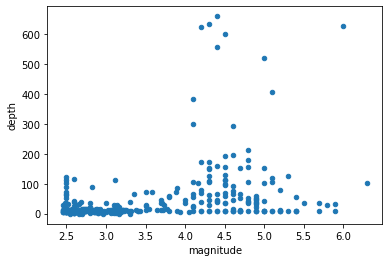

In [11]:
# plot the depth vs. magnitude

df.plot(x='magnitude', y='depth', kind='scatter')

In [12]:
# save the dataframe to disk

df.to_csv('usgs_earthquake_data.csv')

print('file saved')

file saved


In [13]:
# read it back later

new_df = pd.read_csv('usgs_earthquake_data.csv')

print(new_df.head())

   Unnamed: 0  magnitude  depth
0           0       4.10  10.00
1           1       5.50  35.00
2           2       5.20  10.00
3           3       2.83  11.00
4           4       4.20  67.78


# Part 2: Querying an API endpoint

### Mapbox Geocoding API

Services like Google Maps and Mapbox have various APIs that let you access its services through code instead of through GUI apps. This one from Mapbox lets you look up the latitude-longitude coordinates of street addresses.

It works similarly to the earthquakes example, but with query parameters added to the URL endpoint!

**API documentation:**  
https://www.mapbox.com/api-documentation/#geocoding

**API endpoint:**  
https://api.mapbox.com/geocoding/v5/mapbox.places

**API endpoint with query parameters:**  
https://api.mapbox.com/geocoding/v5/mapbox.places/Wurster+Hall.json?access_token=pk.eyJ1IjoiY3AyNTVkZW1vIiwiYSI6ImRPcTlnTUEifQ.3C0d0Nk_rcwV-8JF29PU-w

You can get your own access key by signing up for a Mapbox account, if you'd like. Here is a link for that: https://www.mapbox.com/signin/?route-to=%22/account/access-tokens%22

In [14]:
import json      # library for working with JSON-formatted text strings
import requests  # library for accessing content from web URLs

import pprint    # library for cleanly printing Python data structures
pp = pprint.PrettyPrinter()

In [15]:
# we have to encode the search query so that it can be passed as a URL, 
# with spaces and other special characters removed

endpoint = 'https://api.mapbox.com/geocoding/v5/mapbox.places/'

address = 'Wurster Hall'

params = {'limit': 1,
          'access_token': 'pk.eyJ1IjoiY3AyNTVkZW1vIiwiYSI6ImRPcTlnTUEifQ.3C0d0Nk_rcwV-8JF29PU-w'}

url = requests.Request('GET', endpoint+address+'.json', params=params).prepare().url
print(url)

https://api.mapbox.com/geocoding/v5/mapbox.places/Wurster%20Hall.json?limit=1&access_token=pk.eyJ1IjoiY3AyNTVkZW1vIiwiYSI6ImRPcTlnTUEifQ.3C0d0Nk_rcwV-8JF29PU-w


In [16]:
# download and parse the results

response = requests.get(url)
results = response.text
data = json.loads(results)

print(data)

{'type': 'FeatureCollection', 'query': ['wurster', 'hall'], 'features': [{'id': 'poi.472446416066', 'type': 'Feature', 'place_type': ['poi'], 'relevance': 1, 'properties': {'foursquare': '4b56554cf964a520ce0b28e3', 'landmark': True, 'address': '230 Wurster Hall #1820', 'category': 'college art building, building'}, 'text': 'Wurster Hall / College of Environmental Design', 'place_name': 'Wurster Hall / College of Environmental Design, 230 Wurster Hall #1820, Berkeley, California 94720, United States', 'center': [-122.254883, 37.870818], 'geometry': {'coordinates': [-122.254883, 37.870818], 'type': 'Point'}, 'context': [{'id': 'postcode.1038777018848930', 'text': '94720'}, {'id': 'place.4062647275990170', 'wikidata': 'Q484678', 'text': 'Berkeley'}, {'id': 'region.9803118085738010', 'wikidata': 'Q99', 'short_code': 'US-CA', 'text': 'California'}, {'id': 'country.19678805456372290', 'wikidata': 'Q30', 'short_code': 'us', 'text': 'United States'}]}], 'attribution': 'NOTICE: © 2020 Mapbox an

In [17]:
# print it more nicely

pp.pprint(data)

{'attribution': 'NOTICE: © 2020 Mapbox and its suppliers. All rights reserved. '
                'Use of this data is subject to the Mapbox Terms of Service '
                '(https://www.mapbox.com/about/maps/). This response and the '
                'information it contains may not be retained. POI(s) provided '
                'by Foursquare.',
 'features': [{'center': [-122.254883, 37.870818],
               'context': [{'id': 'postcode.1038777018848930', 'text': '94720'},
                           {'id': 'place.4062647275990170',
                            'text': 'Berkeley',
                            'wikidata': 'Q484678'},
                           {'id': 'region.9803118085738010',
                            'short_code': 'US-CA',
                            'text': 'California',
                            'wikidata': 'Q99'},
                           {'id': 'country.19678805456372290',
                            'short_code': 'us',
                            'text':

In [18]:
# pull out the lat-lon coordinates

for r in data['features']:
    coords = r['geometry']['coordinates']
    print(coords)

[-122.254883, 37.870818]


### Exercises

1. Search for some other addresses or landmarks!
2. Take a look at the [API documentation](https://www.mapbox.com/api-documentation/#geocoding). Can you figure out how to retrieve other points of interest near Wurster Hall?

# Part 3: Querying an API with back-and-forth authentication

### Twitter search APIs

Twitter's APIs operate over the web as well, but they require a back-and-forth authentication process at the beginning of each connection. It's easier to have a Python library handle this than to create the query URLs ourselves.

The Twitter "REST" APIs perform stand-alone operations: you submit a query and receive results, like in earlier examples. ([REST](https://en.wikipedia.org/wiki/Representational_state_transfer) is a particular set of guidelines that many APIs follow.) Twitter also has a "streaming" API that continues sending results in real time until you disconnect.

**API documentation:**  
https://dev.twitter.com/rest/public  
https://dev.twitter.com/overview/api/tweets

**Documentation for the Python helper library**:  
http://geduldig.github.io/TwitterAPI/

**Explanation of different tiers of API accounts:**
https://blog.twitter.com/developer/en_us/topics/tools/2017/introducing-twitter-premium-apis.html

In [21]:
#!pip install TwitterAPI

     |████████████████████████████████| 147 kB 14.9 MB/s eta 0:00:01
  Created wheel for TwitterAPI: filename=TwitterAPI-2.5.14-py3-none-any.whl size=11568 sha256=25fc92b087a5f07a3fcae03ee362ebc6cbeb622bac5c391213a081d6749aa017
  Stored in directory: /Users/waddell/Library/Caches/pip/wheels/30/a5/f7/039e6f13f03a7b448b48432d767fc764800008a41433927756
Successfully built TwitterAPI


In [2]:
from TwitterAPI import TwitterAPI

import pprint
pp = pprint.PrettyPrinter()

In [3]:
# import API credentials from keys.py file in the
# same directory as this notebook

from keys import *

In [4]:
# set up an API connection using credentials from the keys file

api = TwitterAPI(consumer_key, consumer_secret, 
                 access_token, access_token_secret)

print("Connection is set up but not tested")

Connection is set up but not tested


### Making a simple data request

In [22]:
# most recent tweet from CED

endpoint = 'statuses/user_timeline'
params = {
    'screen_name': 'wursterlife', 
    'count': 1
}
r = api.request(endpoint, params)

for tweet in r.get_iterator():
    print(tweet['text'])

RT @WomenatCal150: The College of Environmental Design @wursterlife  have just published a remarkable webpage on the women who have shaped…


In [23]:
# what other data is there?

pp.pprint(tweet)

{'contributors': None,
 'coordinates': None,
 'created_at': 'Fri Oct 09 22:00:30 +0000 2020',
 'entities': {'hashtags': [],
              'symbols': [],
              'urls': [],
              'user_mentions': [{'id': 1108873586394054656,
                                 'id_str': '1108873586394054656',
                                 'indices': [3, 17],
                                 'name': 'BerkeleyWomen150',
                                 'screen_name': 'WomenatCal150'},
                                {'id': 73224104,
                                 'id_str': '73224104',
                                 'indices': [55, 67],
                                 'name': 'UC Berkeley College of Environmental '
                                         'Design',
                                 'screen_name': 'wursterlife'}]},
 'favorite_count': 0,
 'favorited': False,
 'geo': None,
 'id': 1314687205541986305,
 'id_str': '1314687205541986305',
 'in_reply_to_screen_name': None,
 'in_r

### Other API endpoints allow different types of searches

In [24]:
# search for recent tweets with your favorite emoji

endpoint = 'search/tweets'
params = {
    'q': '👻🎃', 
    'count': 5
}
r = api.request(endpoint, params)

for tweet in r.get_iterator():
    print(tweet['text'] + '\n')

RT @bobbykun_banana: 毎日抽選中 #DoleSmile キャンペーン
 
A賞　ハロウィングッズ 5名
B賞　パイナップル10㎏ 10名
C賞　バナペン 100名
どれかを抽選でプレゼント

応募方法
①@bobbykun_bananaをフォロー
②この投稿…

RT @sanipak_jp: ＼🎃とって付きハロウィン袋が当たる！👻／
フォロー＆RT #キャンペーン
#その場で当たる🎁毎日10名様当選！
外れてもWチャンス🎊2,000円相当の賞品プレゼント！

10/20まで毎日チャンス！
🎃応募方法
①@sanipak_jp をフォロ…

RT @sanipak_jp: ＼🎃とって付きハロウィン袋が当たる！👻／
フォロー＆RT #キャンペーン
#その場で当たる🎁毎日10名様当選！
外れてもWチャンス🎊2,000円相当の賞品プレゼント！

10/20まで毎日チャンス！
🎃応募方法
①@sanipak_jp をフォロ…

🎃新作おすすめコーディネート🎃

【ATELIER-PIERROT】
ストライプベストワンピース
ブラック　
⏬ONLINE STORE⏬
https://t.co/UCTtVkvZMd

ハットや蝙蝠カラーブラウスと合わせたハロ… https://t.co/NcvSfJZnqi

RT @sanipak_jp: ＼🎃とって付きハロウィン袋が当たる！👻／
フォロー＆RT #キャンペーン
#その場で当たる🎁毎日10名様当選！
外れてもWチャンス🎊2,000円相当の賞品プレゼント！

10/20まで毎日チャンス！
🎃応募方法
①@sanipak_jp をフォロ…



In [25]:
# search for public tweets in Korean

endpoint = 'search/tweets'
params = {
    'q': '*', 
    'lang': 'ko', 
    'count': 5
} 
r = api.request(endpoint, params)

for tweet in r.get_iterator():
    print(tweet['text'] + '\n')

RT @GoldenChild: [📺] #골드니스 여러분!
잠시 후 PM 1:00 SBS 파워FM '#최화정의파워타임'
#골든차일드 #장준 이 출연합니다❗
오늘도 장준이가 니스들의 월요일 문을
활~짝~! 열었습니다🤗🚪
골드니스💙 오늘 하루도 힘내요🙌🔥…

RT @I_see_bal_: 스폰지밥 고소합니다. 지들이 뭘 안다고 월요일이 좋대 물 밖으로 나오면 오늘 내일 할 새끼들이

히히
귀여워 https://t.co/jNXe0OFmaG

언럭키

@skyeoand 저두요.. 완전히 발광했던거같은데 ... 휴학하고나서가 잡덕질 피크찍었어요 그때꽂힌 가수공연다가고 
그..그 아이유직캠도 휴학할시기!



In [26]:
# search for public tweets geotagged near the UC Berkeley campus

endpoint = 'search/tweets'
params = {
    'q': '*', 
    'geocode': '37.873,-122.260,0.5km', 
    'count': 5
} 
r = api.request(endpoint, params)

for tweet in r.get_iterator():
    print(tweet['text'] + '\n')

@andy Someone’s  mostly and usually always a top just like me, and not my otherworldly interest in the Sun either b… https://t.co/SnLYAqJzat

@annawintour_ Better Yet and to the Furthest Degree: Anna Wintour, Spellbinding Synergy. ;)

@annawintour_ Where do I start and with whom do you want me to start with. Anyway, so say, Hey, to your local best,… https://t.co/38Y3mdI5Ge

⁦⁦@RAFTDofE⁩ Burying your username in unnecessary obfuscation? Such that I now have to type out nearly the entire t… https://t.co/OUVU6QIbJb

⁦@PutinVladimer⁩ May wonders never cease, I’ll bet you’ll never guess who came up with the concept for this entire… https://t.co/avzeKKo3Je



### Exercises

1. Try some different search queries!
2. Display some more data fields in addition to the tweet text

### Bonus: Streaming live tweets in real time 

In [5]:
# Twitter allows only one or two simultaneous streaming connections for 
# each set of API credentials, so this part may not work during class

endpoint = 'statuses/filter'
params = {'locations': '-180,-90,180,90'}
r = api.request(endpoint, params)
LIMIT = 20

# 'enumerate' lets us count tweets as we receive them

for i, tweet in enumerate(r.get_iterator()):
    print(tweet['created_at'])
    print(tweet['place']['full_name'] + ', ' + tweet['place']['country'])
    print(tweet['text'] + '\n')
    if (i > LIMIT): break

# close the streaming connection
r.close()

Mon Oct 12 17:13:22 +0000 2020
Makati City, National Capital Region, Republic of the Philippines
Punyeta ang tagal ko na nag pre-register sa wild rift hanggang ngayon wala parin. Buti pa yung iba nakakalaro na 😒

Mon Oct 12 17:13:22 +0000 2020
Manhattan, NY, United States
@jrobertdobbsjr 🤣

Mon Oct 12 17:13:22 +0000 2020
Liverpool, England, United Kingdom
For all those buildings receiving much needed emergency funding today, please remember with out those free lance ar… https://t.co/yz2gdBnSFg

Mon Oct 12 17:13:22 +0000 2020
Torreón, Coahuila de Zaragoza, México
Esta cabron

Mon Oct 12 17:13:22 +0000 2020
Idaho, USA, United States
@TdLombard @KendaBeall1 Got your back Texas Patriot! #Trump2020LandslideVictoryBaby #AmyConeyBarrettSCOTUS

Mon Oct 12 17:13:22 +0000 2020
Batangas City, Calabarzon, Republic of the Philippines
my yoonmin hearteu😔👈🏻

Mon Oct 12 17:13:22 +0000 2020
Gussago, Lombardia, Italia
È durante le difficoltà che si capisce chi sono i conoscenti e chi sono i veri amici..

### Exercises

Choose your favorite:

1. Make a scatter plot of the lat-lon coordinates of earthquakes.  
   &nbsp;
   
2. The earthquakes API is actually returning a specific data format called [GeoJSON](https://en.wikipedia.org/wiki/GeoJSON), also used by many other geospatial data feeds. Try saving the raw GeoJSON file and opening it in QGIS or in the [geojson.io](http://geojson.io) web viewer.  
   &nbsp;

2. Using the geocoding example as a starting point, try searching Mapbox's Directions API or Isochrone (travel time contours) API instead. You can read more about them on the [Mapbox API documentation page](https://www.mapbox.com/api-documentation/#introduction).  
    &nbsp;

3. Try out another API that you're interested in. Can you figure out how to connect to it using Python?  

   With municipal data it's often easiest to just download a data file, but APIs are great for querying big data sets or tracking live updates. Here are some resources.

   - San Francisco:  https://data.sfgov.org/developers  
   - Alameda County:  https://data.acgov.org/developers  
   - UC Berkeley:  https://api-central.berkeley.edu  
   - US Census:  http://www.census.gov/data/developers/data-sets.html  
   - Open Data Network:  https://www.opendatanetwork.com  
   - CivicData:  http://www.civicdata.io/  